In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [169]:
data = pd.read_csv('./Assign3_Customer_Profiling.csv',sep=',')

In [170]:
# data = data.join(pd.get_dummies(data.pop('region')))
nominalFields = data.columns[data.dtypes == 'object']
lb_encoder = LabelEncoder()
for label in nominalFields:
    data[label] = lb_encoder.fit_transform(data[label])

In [171]:
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(data), columns=data.columns)

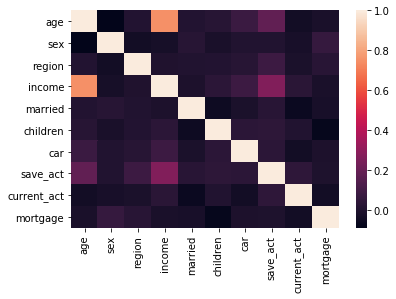

In [172]:
dataCorr = data.corr()
sns.heatmap(dataCorr)
plt.show()

In [173]:
# data[0:5]
data2 = pd.DataFrame(data[['income','age']].values, columns=[['income','age']])
data2[0:5]

,income,age
0,-0.774168,0.388887
1,0.198706,-0.166170
2,-0.849474,0.597034
3,-0.554643,-1.345667
4,1.788562,1.013327


In [180]:
K = range(2,21,1)
KMs = [KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=10).fit(data[['income','age']]) for k in K]

Text(0,0.5,u'The sum of squared errors')

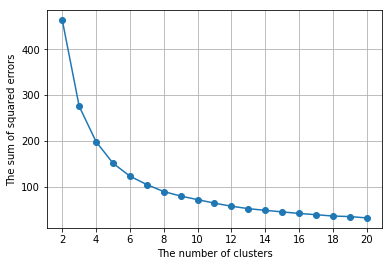

In [181]:
# A list contains each sum of total squared errors 
squared_errors = [ kms.inertia_ for kms in KMs ]

ax = plt.figure().gca()
ax.plot(K, squared_errors,'o-')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True)
ax.set_xlabel("The number of clusters")
ax.set_ylabel("The sum of squared errors")

In [189]:
def doKmeans(X, nclust=2):
    model = KMeans(n_clusters=nclust, init='k-means++', max_iter=1000, random_state=10)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data[['income','age']], 6)

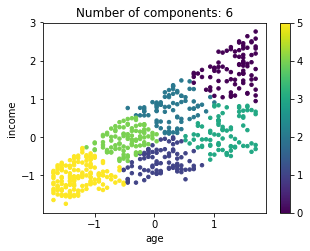

In [191]:
# fig, ax= plt.figure(figsize=(15,4))
# i = 0
# for X in range( len(data.columns) - 2 ):
#     for Y in range( X + 1, len(data.columns) - 1 ):
#         i += 1
#         ax = fig.add_subplot(15,6,i)
#         scatter = ax.scatter(data.iloc[:,X],data.iloc[:,Y],c=data['cluster'], s=50)
#         ax.set_title('K-Means Clustering' + str(X) + '-' + str(Y))
#         ax.set_xlabel(data.columns[X])
#         ax.set_ylabel(data.columns[Y])
#         plt.colorbar(scatter)

# scatter = plt.scatter(data2['age'],data2['income'],c=data2['cluster'], s=50)
# plt.set_title('K-Means Clustering')
# plt.set_xlabel('age')
# plt.set_ylabel('income')
# plt.colorbar(scatter)

fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
ax.scatter(data['age'], data['income'], s=12, c=clust_labels)
ax.set_title('Number of components: ' + str(n_clusters))
ax.set_xlabel('age')
ax.set_ylabel('income')
plt.colorbar(scatter)

# ax = fig.add_subplot(132)
# scatter = ax.scatter(data['age'],data['save_act'],c=data['cluster'], s=50)
# ax.set_title('K-Means Clustering')
# ax.set_xlabel('age')
# ax.set_ylabel('save_act')
# plt.colorbar(scatter)

# ax = fig.add_subplot(133)
# scatter = ax.scatter(data['income'],data['save_act'],c=data['cluster'], s=50)
# ax.set_title('K-Means Clustering')
# ax.set_xlabel('income')
# ax.set_ylabel('save_act')
# plt.colorbar(scatter)

In [216]:
eps = np.arange(0.1,10,0.2)
ms = range(2,15,1)
for e in eps:
    for m in ms:
        db = DBSCAN(eps=e, min_samples=m, algorithm='ball_tree').fit(data[['income','age']])
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        print 'eps: %f, min_samples: %d, Estimated number of clusters: %d' % (e, m, n_clusters_)

eps: 0.100000, min_samples: 2, Estimated number of clusters: 65
eps: 0.100000, min_samples: 3, Estimated number of clusters: 45
eps: 0.100000, min_samples: 4, Estimated number of clusters: 42
eps: 0.100000, min_samples: 5, Estimated number of clusters: 34
eps: 0.100000, min_samples: 6, Estimated number of clusters: 20
eps: 0.100000, min_samples: 7, Estimated number of clusters: 17
eps: 0.100000, min_samples: 8, Estimated number of clusters: 10
eps: 0.100000, min_samples: 9, Estimated number of clusters: 7
eps: 0.100000, min_samples: 10, Estimated number of clusters: 4
eps: 0.100000, min_samples: 11, Estimated number of clusters: 2
eps: 0.100000, min_samples: 12, Estimated number of clusters: 1
eps: 0.100000, min_samples: 13, Estimated number of clusters: 0
eps: 0.100000, min_samples: 14, Estimated number of clusters: 0
eps: 0.300000, min_samples: 2, Estimated number of clusters: 1
eps: 0.300000, min_samples: 3, Estimated number of clusters: 1
eps: 0.300000, min_samples: 4, Estimated nu

eps: 2.300000, min_samples: 3, Estimated number of clusters: 1
eps: 2.300000, min_samples: 4, Estimated number of clusters: 1
eps: 2.300000, min_samples: 5, Estimated number of clusters: 1
eps: 2.300000, min_samples: 6, Estimated number of clusters: 1
eps: 2.300000, min_samples: 7, Estimated number of clusters: 1
eps: 2.300000, min_samples: 8, Estimated number of clusters: 1
eps: 2.300000, min_samples: 9, Estimated number of clusters: 1
eps: 2.300000, min_samples: 10, Estimated number of clusters: 1
eps: 2.300000, min_samples: 11, Estimated number of clusters: 1
eps: 2.300000, min_samples: 12, Estimated number of clusters: 1
eps: 2.300000, min_samples: 13, Estimated number of clusters: 1
eps: 2.300000, min_samples: 14, Estimated number of clusters: 1
eps: 2.500000, min_samples: 2, Estimated number of clusters: 1
eps: 2.500000, min_samples: 3, Estimated number of clusters: 1
eps: 2.500000, min_samples: 4, Estimated number of clusters: 1
eps: 2.500000, min_samples: 5, Estimated number of

eps: 4.500000, min_samples: 10, Estimated number of clusters: 1
eps: 4.500000, min_samples: 11, Estimated number of clusters: 1
eps: 4.500000, min_samples: 12, Estimated number of clusters: 1
eps: 4.500000, min_samples: 13, Estimated number of clusters: 1
eps: 4.500000, min_samples: 14, Estimated number of clusters: 1
eps: 4.700000, min_samples: 2, Estimated number of clusters: 1
eps: 4.700000, min_samples: 3, Estimated number of clusters: 1
eps: 4.700000, min_samples: 4, Estimated number of clusters: 1
eps: 4.700000, min_samples: 5, Estimated number of clusters: 1
eps: 4.700000, min_samples: 6, Estimated number of clusters: 1
eps: 4.700000, min_samples: 7, Estimated number of clusters: 1
eps: 4.700000, min_samples: 8, Estimated number of clusters: 1
eps: 4.700000, min_samples: 9, Estimated number of clusters: 1
eps: 4.700000, min_samples: 10, Estimated number of clusters: 1
eps: 4.700000, min_samples: 11, Estimated number of clusters: 1
eps: 4.700000, min_samples: 12, Estimated number

eps: 6.700000, min_samples: 10, Estimated number of clusters: 1
eps: 6.700000, min_samples: 11, Estimated number of clusters: 1
eps: 6.700000, min_samples: 12, Estimated number of clusters: 1
eps: 6.700000, min_samples: 13, Estimated number of clusters: 1
eps: 6.700000, min_samples: 14, Estimated number of clusters: 1
eps: 6.900000, min_samples: 2, Estimated number of clusters: 1
eps: 6.900000, min_samples: 3, Estimated number of clusters: 1
eps: 6.900000, min_samples: 4, Estimated number of clusters: 1
eps: 6.900000, min_samples: 5, Estimated number of clusters: 1
eps: 6.900000, min_samples: 6, Estimated number of clusters: 1
eps: 6.900000, min_samples: 7, Estimated number of clusters: 1
eps: 6.900000, min_samples: 8, Estimated number of clusters: 1
eps: 6.900000, min_samples: 9, Estimated number of clusters: 1
eps: 6.900000, min_samples: 10, Estimated number of clusters: 1
eps: 6.900000, min_samples: 11, Estimated number of clusters: 1
eps: 6.900000, min_samples: 12, Estimated number

eps: 8.700000, min_samples: 11, Estimated number of clusters: 1
eps: 8.700000, min_samples: 12, Estimated number of clusters: 1
eps: 8.700000, min_samples: 13, Estimated number of clusters: 1
eps: 8.700000, min_samples: 14, Estimated number of clusters: 1
eps: 8.900000, min_samples: 2, Estimated number of clusters: 1
eps: 8.900000, min_samples: 3, Estimated number of clusters: 1
eps: 8.900000, min_samples: 4, Estimated number of clusters: 1
eps: 8.900000, min_samples: 5, Estimated number of clusters: 1
eps: 8.900000, min_samples: 6, Estimated number of clusters: 1
eps: 8.900000, min_samples: 7, Estimated number of clusters: 1
eps: 8.900000, min_samples: 8, Estimated number of clusters: 1
eps: 8.900000, min_samples: 9, Estimated number of clusters: 1
eps: 8.900000, min_samples: 10, Estimated number of clusters: 1
eps: 8.900000, min_samples: 11, Estimated number of clusters: 1
eps: 8.900000, min_samples: 12, Estimated number of clusters: 1
eps: 8.900000, min_samples: 13, Estimated number

In [237]:
db = DBSCAN(eps=0.1, min_samples=7, algorithm='ball_tree').fit(data[['income','age']])
db.fit_predict(data[['income','age']])
newData = data
newData['label'] = db.labels_
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
colors = sns.color_palette(n_colors=n_clusters)
# colors = ['blue','green','red','cyan','magenta','yellow','black']
cl = [colors[i] for i in db.labels_]
print n_clusters

17


Text(0,0.5,u'income')

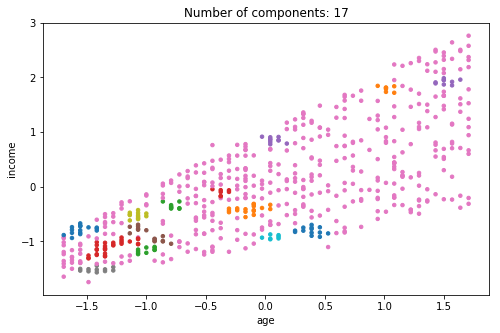

In [238]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(newData['age'], newData['income'], s=12, c=cl);
ax.set_title('Number of components: ' + str(n_clusters))
ax.set_xlabel('age')
ax.set_ylabel('income')

Estimated number of clusters: 6
set([0, 1, 2, 3, 4, 5, -1])


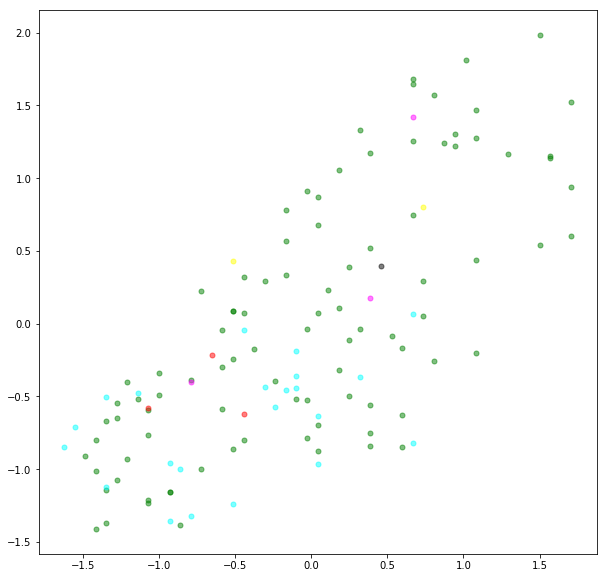

In [74]:
core_samples_mask = np.zeros_like(DBKMs.labels_, dtype=bool)
core_samples_mask[DBKMs.core_sample_indices_] = True
labels = DBKMs.labels_
n_clusters_ = len(set(DBKMs.labels_)) - (1 if -1 in DBKMs.labels_ else 0)
print 'Estimated number of clusters: %d' % n_clusters_

unique_labels = set(labels)
print unique_labels

plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
c = ['blue','green','red','cyan','magenta','yellow','black']
for k in unique_labels:
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:,0], xy.iloc[:, 3], 'o', color=c[k+1],markersize=5, alpha=0.5)

#     xy = data[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:,0], xy.iloc[:, 3], 'o', color=col, markersize=5, alpha=0.5)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

Text(0,0.5,u'region')

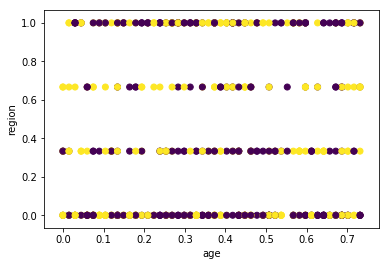

In [46]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 2], c=y_pred)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[2])

In [118]:
# X, y = make_blobs(n_samples=1500, random_state=170)
# y_pred = KMeans(n_clusters=3, random_state=17).fit_predict(X)

# plt.subplot(221)
# plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.title("Incorrect Number of Blobs")
# X
# data.to_csv('Assign3_Customer_Profiling_Processed.csv',index=False)
X, labels_true = make_blobs(n_samples=750, cluster_std=0.4,
                            random_state=0)
X

array([[2.36434546, 0.23302434],
       [0.92311785, 4.18467098],
       [1.64221028, 0.72296432],
       ...,
       [1.84156446, 4.83839851],
       [2.16897939, 1.59473117],
       [0.73774446, 4.28276041]])

In [125]:
# data.to_csv('./Assign3_Customer_Profiling_V1.csv',sep=',',index=False)
# kmeans = pd.DataFrame(clust_labels)
# data.columns
# fig = plt.figure(figsize=(60,1))


In [ ]:
# squared_errors = [1164.4733763927732, 1081.3710039768544, 1000.2676880029024, 952.9548823073874,
#                   908.0142745677492, 842.1883947523381, 791.5151545054035, 767.2203738742217, 
#                   735.6152467403548, 721.7768570945448, 700.8791644057131, 680.5565058839766, 
#                   668.2856353706196, 647.3836956172936, 635.539178866277, 622.3417690112749, 
#                   607.9716850652401, 589.2156980610259, 581.8758455406195]
# squared_errors_Density = [1164.4733763927732, 1081.3710039768544, 1000.2676880029024, 952.9548823073874, 
#                           908.0142745677492, 842.1883947523381, 791.5151545054035, 767.2203738742217,
#                           735.6152467403548, 721.7768570945448, 700.8791644057131, 680.5565058839766,
#                           668.2856353706196, 647.3836956172936, 635.539178866277, 622.3417690112749,
#                           607.9716850652401, 589.2156980610259, 581.8758455406195]

# fig = plt.figure(figsize=(10,3.5))
# ax = fig.add_subplot(121)
# ax.plot(K, squared_errors_Density,'o-',c='blue')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.grid(True)
# ax.set_xlabel("The number of clusters")
# ax.set_ylabel("The sum of squared errors (SimpleKMeans)")

# ax = fig.add_subplot(122)
# ax.plot(K, squared_errors,'o-',c='red')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.grid(True)
# ax.set_xlabel("The number of clusters")
# ax.set_ylabel("The sum of squared errors (MakeDensityBasedClusterer)")